In [38]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pywt # librairie ondelettes PyWavelets
import itertools

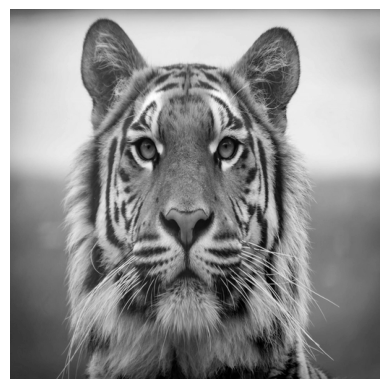

In [39]:
I = cv2.imread("08.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(I, cmap='gray')
plt.axis('off')
# plt.title("Image original en niveaux de gris")
plt.show()

In [40]:
def zigzag_order(matrix):
    """
    Retourne un tableau 1D contenant les éléments de la matrice en ordre zigzag.
    """
    rows, col = matrix.shape
    Lim_col= col-1
    Lim_rows = rows-1
    result = []

    for Sxy in range(Lim_col+ 1):
        if Sxy % 2 != 0:  # Si Sxy est impair
            for i in range(Sxy + 1):
                j = Sxy - i
                result.append(matrix[i][j])
        else:  # Si Sxy est pair
            for j in range(Sxy + 1):
                i = Sxy - j
                result.append(matrix[i][j])

    # Deuxième partie (Sxy de Lim_col+1 à Lim_rows)
    for Sxy in range(Lim_col+ 1, Lim_rows + 1):
        if Sxy % 2 != 0:  # Si Sxy est impair
            for i in range(Sxy - Lim_col, Lim_col+ 1):
                j = Sxy - i
                result.append(matrix[i][j])
        else:  # Si Sxy est pair
            for j in range(Sxy - Lim_col, Lim_col+ 1):
                i = Sxy - j
                result.append(matrix[i][j])
    return np.array(result)


In [41]:
#Codage par plage : 
def run_length_encoding(X,n_bit):
    """
    Effectue un codage par plage sur un vecteur binaire X.
    Retourne une liste de tuples (valeur, longueur de la plage).
    """
    if len(X) == 0:
        return []
    max

    maximum = 0
    for i in range(n_bit):
        maximum+=2**i
    # Liste pour stocker les paires (valeur, longueur)
    encoded = []
    
    # Initialisation des variables
    current_value = X[0]
    if current_value!=1:
        encoded.append(0)
        
    count = 1
    # Parcours du vecteur à partir du deuxième élément
    for i in range(1, len(X)):
        if count==maximum:
            encoded.append(count)
            current_value = X[i]  # Changer de valeur
            count = 0 

        if X[i] == current_value:
            count += 1  # Si la valeur est identique, on augmente le compteur
        else:
            encoded.append(count)
            current_value = X[i]  # Changer de valeur
            count = 1  # Réinitialiser le compteur

        

    # Ajouter la dernière plage
    encoded.append(count)
    
    return encoded

codage_position = run_length_encoding(zigzag_sequence,3)
print("zigzag_sequence : ",zigzag_sequence)
print("codage_position : ",codage_position)

zigzag_sequence :  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
codage_position :  [1, 7, 7, 7, 7, 7]


In [42]:
def min_bits_to_code(values):
    """
    Retourne le nombre de bits minimum nécessaires pour coder tous les nombres dans la liste,
    en tenant compte des nombres négatifs et positifs.
    """
    # Vérifier la liste est vide
    # if not values:
    #     return 0  # Pas de valeurs à coder

    # Convertir les valeurs en entiers Python pour pouvoir utiliser bit_length()
    max_value = max(map(int, values))
    num_bits = max_value.bit_length()
    
    # Si la liste contient des nombres négatifs, ajouter 1 bit pour le signe
    if any(val < 0 for val in values):
        num_bits += 1

    return num_bits


Optimisation

Taille de l'image originale :  2097152

Avec codage par plage sans optim
Taille de l'image compressée :  278023
Taux de compression :  7.543088161770789

Avec codage par plage avec optim
Taille de l'image compressée :  212074
Taux de compression :  9.888774672991502

Sans codage par plage sans optim
Taille de l'image compressée :  322813
Taux de compression :  6.496491776973047
taille_sans_codage_position_p :  102666
taille_sans_codage_position_v :  175357


C:\Users\gaell\AppData\Local\Temp\ipykernel_24692\3079857801.py:141: RuntimeWarning: invalid value encountered in log1p
  I_dct_complet[u:u+8, v:v+8] = np.log1p(bloc_dct)
C:\Users\gaell\AppData\Local\Temp\ipykernel_24692\3079857801.py:141: RuntimeWarning: invalid value encountered in cast
  I_dct_complet[u:u+8, v:v+8] = np.log1p(bloc_dct)
C:\Users\gaell\AppData\Local\Temp\ipykernel_24692\3079857801.py:141: RuntimeWarning: divide by zero encountered in log1p
  I_dct_complet[u:u+8, v:v+8] = np.log1p(bloc_dct)


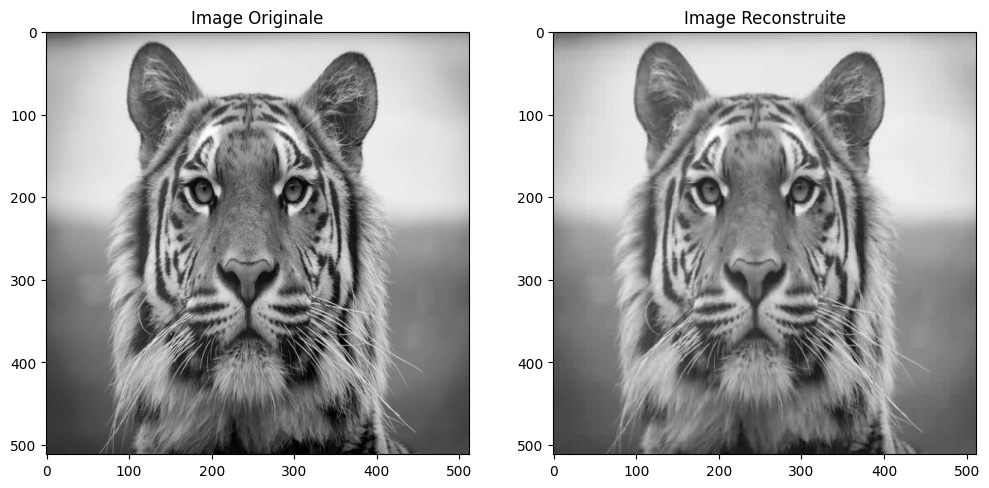

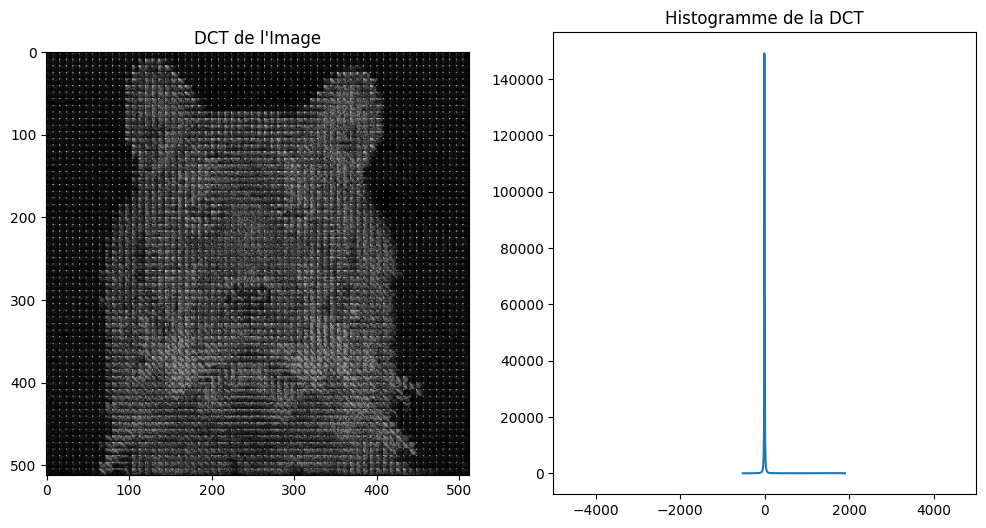

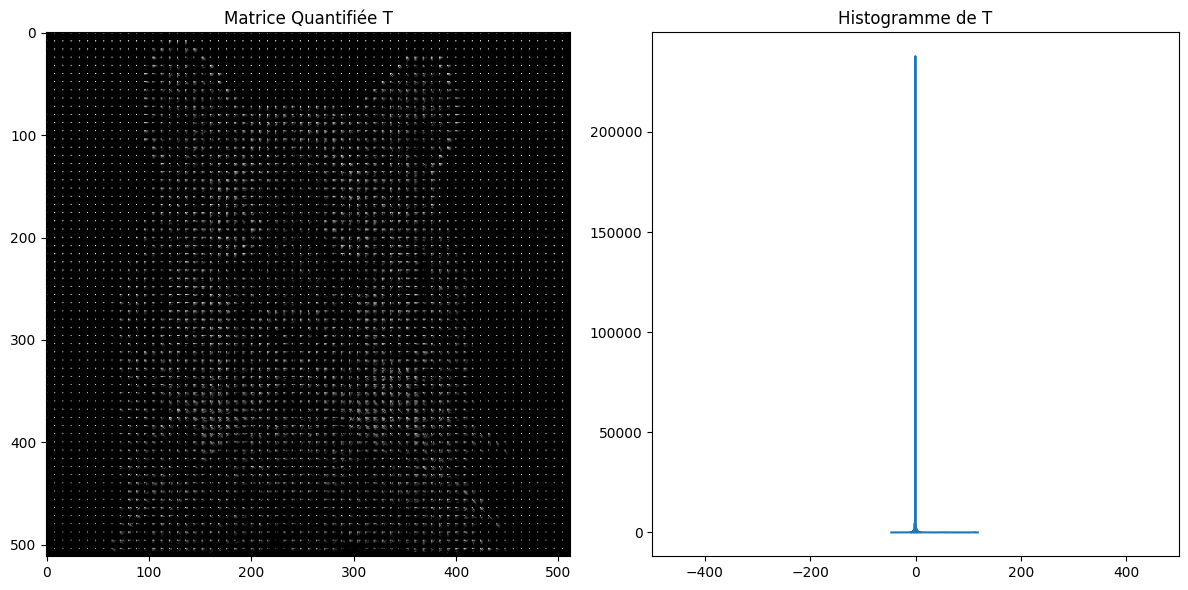

In [46]:
# Initialisation des variables
blocs = []  # Liste pour stocker les blocs
blocs_dct = []  # Liste pour stocker les blocs
blocs_quantifies = []  # Liste pour stocker les blocs quantifiés
blocs_pos = []  # Liste pour stocker les blocs de position
blocs_reco = []  # Liste pour stocker les blocs reconstruits
taille = 0
taille_sans_codage_position = 0
taille_optim = 0
taille_sans_codage_position_p = 0
taille_sans_codage_position_v = 0
n_bits = 3

def soustrait_previous_max(valeurs,previous_val):
    new_previous = previous_val
    for i in range(len(valeurs)):
        val = valeurs[i]
        if abs(val)>abs(new_previous):
            new_previous = val

        if abs(val-previous_val)<100:
            valeurs[i]=val-previous_val
            
    return valeurs, new_previous


Z = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

# Diviser l'image en blocs 8x8 et stocker dans une liste
x, y = I.shape
for u in range(0, x, 8):
    for v in range(0, y, 8):
        bloc = I[u:u+8, v:v+8]
        blocs.append((u, v, bloc))  # Ajouter le bloc avec ses indices (u, v)

# Traiter chaque bloc de manière individuelle
previous_val_max = 0
tempo = 0
for u, v, bloc in blocs:
    # Calcul de la DCT sur le bloc
    bloc_dct = cv2.dct(np.float32(bloc))
    blocs_dct.append((u, v, bloc_dct))
    
    # Quantification
    bloc_quantifie = np.fix(bloc_dct / Z) # arrondis le plus proche de 0
    blocs_quantifies.append((u, v, bloc_quantifie))  # Ajouter le bloc quantifié à la liste
    
    # Matrice de position (1 si quantifié > 0, 0 sinon)
    bloc_pos = (bloc_quantifie > 0).astype(int)
    blocs_pos.append((u, v, bloc_pos))  # Ajouter le bloc de position à la liste
    
    # Vecteur de position en zigzag
    zigzag_sequence = zigzag_order(bloc_pos)
    
    # Encodage par run-length
    positions_code = run_length_encoding(zigzag_sequence, n_bits)
    
    # Valeurs à encoder
    valeurs = bloc_quantifie[bloc_quantifie!=0]
    min_bit = min_bits_to_code(valeurs)
    
    taille_sans_codage_position_p += n_bits * len(positions_code)
    taille_sans_codage_position_v += min_bit * len(valeurs)
    taille += n_bits * len(positions_code) + min_bit * len(valeurs)
    taille_sans_codage_position += 1 * len(zigzag_sequence) + min_bit * len(valeurs)

    valeurs_optim = valeurs
    tempo = valeurs[0]
    valeurs_optim[0] = valeurs[0] - previous_val_max
    previous_val_max = tempo
    # valeurs_optim,previous_val_max = soustrait_previous_max(valeurs,previous_val_max)
    min_bit_optim = min_bits_to_code(valeurs_optim)
    taille_optim += n_bits * len(positions_code) + min_bit_optim * len(valeurs_optim)
    
    
    # Mise à jour de la taille (compression)
    
    
    

    
    # Reconstruction de l'imagette avec iDCT
    bloc_reconstruit = cv2.idct(bloc_quantifie.astype(np.float32) * Z)
    blocs_reco.append((u, v, bloc_reconstruit))  # Ajouter le bloc reconstruit à la liste

# Taille originale de l'image
taille_ori = x * y * 8

# Affichage de la taille
print("Taille de l'image originale : ", taille_ori)
print("")
print("Avec codage par plage sans optim")
print("Taille de l'image compressée : ", taille)
print("Taux de compression : ", taille_ori / taille)
print("")

print("Avec codage par plage avec optim")
print("Taille de l'image compressée : ", taille_optim)
print("Taux de compression : ", taille_ori / taille_optim)
print("")

print("Sans codage par plage sans optim")
print("Taille de l'image compressée : ", taille_sans_codage_position)
print("Taux de compression : ", taille_ori / taille_sans_codage_position)
print("taille_sans_codage_position_p : ", taille_sans_codage_position_p)
print("taille_sans_codage_position_v : ", taille_sans_codage_position_v)

# Affichage des résultats
plt.figure(figsize=(12, 6))

# Affichage de l'image originale et de l'image reconstruite
# Reconstruction de l'image complète à partir des blocs
I_reco =  np.zeros((x,y),np.float32)
for u, v, bloc_reconstruit in blocs_reco:
    I_reco[u:u+8, v:v+8] = bloc_reconstruit

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title("Image Originale")

plt.subplot(1, 2, 2)
plt.imshow(I_reco, cmap='gray')
plt.title("Image Reconstruite")

# Affichage de la DCT et de son histogramme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
I_dct_complet = np.zeros_like(I)
x, y = I.shape
I_dct = np.zeros((x,y),np.float32)
for u, v, bloc_dct in blocs_dct:
    I_dct_complet[u:u+8, v:v+8] = np.log1p(bloc_dct)
    I_dct[u:u+8, v:v+8] = bloc_dct # On applique la DCT directement dans la reconstruction de l'image
plt.imshow(np.log1p(np.abs(I_dct)), cmap='gray')
plt.title("DCT de l'Image")

# Histogramme de la DCT avec barres
plt.subplot(1, 2, 2)
hist_dct, bins_dct = np.histogram(I_dct, bins=256)
bin_centers_dct = 0.5 * (bins_dct[:-1] + bins_dct[1:])  # Calculer les centres des bins
# plt.bar(bin_centers_dct, hist_dct, width=(bins_dct[1] - bins_dct[0]), color='blue', alpha=0.7)
plt.plot(bins_dct[0:-1],hist_dct)
plt.xlim(-5000, 5000)  # Ajuster les limites en fonction des données
plt.title("Histogramme de la DCT")

# Affichage de la matrice T (après quantification) et de son histogramme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
T_complet =  np.zeros((x,y),np.float32)
T_complet_norm =  np.zeros((x,y),np.float32)
for u, v, bloc_quantifie in blocs_quantifies:
    T_complet[u:u+8, v:v+8] = bloc_quantifie
    # T_complet_norm[u:u+8, v:v+8] = np.log1p(bloc_quantifie)
    
plt.imshow(np.log1p(np.abs(T_complet)), cmap='gray')
plt.title("Matrice Quantifiée T")

# Histogramme de la matrice T avec barres
plt.subplot(1, 2, 2)
hist_dct, bins_dct = np.histogram(T_complet, bins=256)
bin_centers_dct = 0.5 * (bins_dct[:-1] + bins_dct[1:])  # Calculer les centres des bins
plt.plot(bins_dct[0:-1],hist_dct)
plt.xlim(-500, 500)  # Ajuster les limites en fonction des données
plt.title("Histogramme de T")

plt.tight_layout()
plt.show()
